In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import confusion_matrix, fbeta_score, f1_score, make_scorer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.neighbors import KNeighborsRegressor as KNN_R
from sklearn.model_selection import ParameterGrid, GridSearchCV
from sklearn.feature_selection import mutual_info_regression
from imblearn.over_sampling import SMOTE
from category_encoders import TargetEncoder
from xgboost import XGBClassifier
import lightgbm as lgb
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Flatten, BatchNormalization, Dropout
from tensorflow.keras.metrics import binary_crossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
RSEED = 40

#%matplotlib.pyplot inline


In [2]:
change = input('What change did you make :')

In [3]:
train_path = "C:\\Users\\munod\\OneDrive\\Documents\\Datasets\\ZINDI\\Train.csv"
data_train = pd.read_csv(train_path)
data_train = data_train
data_train.head()

test_path = "C:\\Users\\munod\\OneDrive\\Documents\\Datasets\\ZINDI\\Test.csv"
data_test = pd.read_csv(test_path)
data_test = data_test
#pd.display(data.head(), 'Test', data_test.head())

test_path = "C:\\Users\\munod\\OneDrive\\Documents\\Datasets\\ZINDI\\economic_indicators.csv"
data_econ = pd.read_csv(test_path)

In [4]:
data = pd.concat([data_train, data_test]).reset_index(drop=True)

In [5]:
display("Train", data_train.head(), "Test", data_test.head(), "Combined", data.head())

'Train'

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
0,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,7,Repeat Loan,120.85,0.014305,121.0,0
1,ID_248919228515267278,248919,Kenya,228515,267278,Type_1,25895.0,25979.0,2022-07-30,2022-08-06,7,Repeat Loan,7768.50,0.300000,7794.0,0
2,ID_308486370501251804,308486,Kenya,370501,251804,Type_7,6900.0,7142.0,2024-09-06,2024-09-13,7,Repeat Loan,1380.00,0.200000,1428.0,0
3,ID_266004285009267278,266004,Kenya,285009,267278,Type_1,8958.0,9233.0,2022-10-20,2022-10-27,7,Repeat Loan,2687.40,0.300000,2770.0,0
4,ID_253803305312267278,253803,Kenya,305312,267278,Type_1,4564.0,4728.0,2022-11-28,2022-12-05,7,Repeat Loan,1369.20,0.300000,1418.0,0


'Test'

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid
0,ID_269404226088267278,269404,Kenya,226088,267278,Type_1,1919.0,1989.0,2022-07-27,2022-08-03,7,Repeat Loan,575.7,0.300000,597.0
1,ID_255356300042267278,255356,Kenya,300042,267278,Type_1,2138.0,2153.0,2022-11-16,2022-11-23,7,Repeat Loan,0.0,0.000000,0.0
2,ID_257026243764267278,257026,Kenya,243764,267278,Type_1,8254.0,8304.0,2022-08-24,2022-08-31,7,Repeat Loan,207.0,0.025079,208.0
3,ID_264617299409267278,264617,Kenya,299409,267278,Type_1,3379.0,3379.0,2022-11-15,2022-11-22,7,Repeat Loan,1013.7,0.300000,1014.0
4,ID_247613296713267278,247613,Kenya,296713,267278,Type_1,120.0,120.0,2022-11-10,2022-11-17,7,Repeat Loan,36.0,0.300000,36.0


'Combined'

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
0,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,7,Repeat Loan,120.85,0.014305,121.0,0.0
1,ID_248919228515267278,248919,Kenya,228515,267278,Type_1,25895.0,25979.0,2022-07-30,2022-08-06,7,Repeat Loan,7768.50,0.300000,7794.0,0.0
2,ID_308486370501251804,308486,Kenya,370501,251804,Type_7,6900.0,7142.0,2024-09-06,2024-09-13,7,Repeat Loan,1380.00,0.200000,1428.0,0.0
3,ID_266004285009267278,266004,Kenya,285009,267278,Type_1,8958.0,9233.0,2022-10-20,2022-10-27,7,Repeat Loan,2687.40,0.300000,2770.0,0.0
4,ID_253803305312267278,253803,Kenya,305312,267278,Type_1,4564.0,4728.0,2022-11-28,2022-12-05,7,Repeat Loan,1369.20,0.300000,1418.0,0.0


### Notes
1. Change customer ID to object
2. date as date
3. list num vs cat
4. Drop country id
5. Changer lender ID from num to cat
6. RSEED
7. Research techiniques to combat the imbalance between target 0 and 1 
8. Consider doing anomaly detection
9. Adjust onehotencoder to have 1 column for binary
10. Dates to Year, Month, Day column
11. Binary Encode New vs Repeat
12. Deal with Outliers
13. Drop Lender_portion_to_be_repaid
14. Create New Features e.g. Interest rate, Real interest_rate (adjusted for inflation)
15. Total_Amount/Duration
16. real_interest_rate of Past loan - Current Loan real_interest_rate
17. Write Function documentation with input and output
18. Combine datasets before feature engineering 
19. Calculate loan duration
20. Calculate Week day
21. Optuna
22. Previous versions have error with the encoding for loan type X_train used instead of X_test
23. Vectorize all the feature transformations
24. day, month, year to objects
25. FICO history (number of previous loans, open loans, total amount open loans, time from first loan)
- Payment history (35%) number of previous loans repaid, amount of previous loans repaid, 
- Amount owed (30%) open loans, total amount open loans,
- Length of credit history (15%) time from first loan
- New credit (10%) Number of loans in the previous 3 months
- Credit mix (10%) Mix of loan types


In [6]:
display("Train", data_train.info(), "Test", data_test.info(), "Combined", data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68654 entries, 0 to 68653
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           68654 non-null  object 
 1   customer_id                  68654 non-null  int64  
 2   country_id                   68654 non-null  object 
 3   tbl_loan_id                  68654 non-null  int64  
 4   lender_id                    68654 non-null  int64  
 5   loan_type                    68654 non-null  object 
 6   Total_Amount                 68654 non-null  float64
 7   Total_Amount_to_Repay        68654 non-null  float64
 8   disbursement_date            68654 non-null  object 
 9   due_date                     68654 non-null  object 
 10  duration                     68654 non-null  int64  
 11  New_versus_Repeat            68654 non-null  object 
 12  Amount_Funded_By_Lender      68654 non-null  float64
 13  Lender_portion_F

'Train'

None

'Test'

None

'Combined'

None

In [7]:
display("Train", data_train.describe(), "Test", data_test.describe())

'Train'

,customer_id,tbl_loan_id,lender_id,Total_Amount,Total_Amount_to_Repay,duration,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
count,68654.000000,68654.000000,68654.000000,6.865400e+04,6.865400e+04,68654.000000,6.865400e+04,68654.000000,6.865400e+04,68654.000000
mean,254390.256780,263056.266248,266420.528462,1.483683e+04,1.563993e+04,8.544586,2.545663e+03,0.218679,2.652621e+03,0.018324
std,26642.719918,39486.661487,3590.999004,1.416499e+05,1.650784e+05,13.343145,1.192272e+04,0.129832,1.338006e+04,0.134120
min,145.000000,101323.000000,245684.000000,2.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,248945.750000,233942.250000,267278.000000,2.295000e+03,2.329000e+03,7.000000,2.340000e+02,0.118712,2.390000e+02,0.000000
50%,255361.000000,260305.500000,267278.000000,5.249000e+03,5.325000e+03,7.000000,9.150000e+02,0.300000,9.340000e+02,0.000000
75%,262269.250000,286962.750000,267278.000000,1.145000e+04,1.165000e+04,7.000000,2.272650e+03,0.300000,2.317000e+03,0.000000
max,312737.000000,375320.000000,267278.000000,2.300000e+07,2.541500e+07,1096.000000,1.600000e+06,1.168119,1.821338e+06,1.000000


'Test'

,customer_id,tbl_loan_id,lender_id,Total_Amount,Total_Amount_to_Repay,duration,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid
count,18594.000000,18594.000000,18594.000000,1.859400e+04,1.859400e+04,18594.000000,18594.000000,18594.000000,18594.000000
mean,262489.507207,282416.633538,271876.749274,1.446507e+04,1.578416e+04,13.530763,2278.430133,0.207090,2466.451967
std,28957.312848,52907.548852,12349.646095,1.569085e+05,1.871893e+05,36.437325,6784.429774,0.122085,7680.081817
min,6083.000000,104034.000000,245684.000000,5.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,0.000000
25%,250357.000000,240880.500000,267278.000000,2.101900e+03,2.164480e+03,7.000000,239.360000,0.131313,244.035000
50%,259107.000000,273442.500000,267278.000000,4.740000e+03,4.828000e+03,7.000000,744.575000,0.300000,758.920000
75%,270051.250000,304856.000000,267278.000000,1.026775e+04,1.056757e+04,7.000000,1998.000000,0.300000,2041.000000
max,312696.000000,375320.000000,297183.000000,2.000000e+07,2.415284e+07,849.000000,400000.000000,1.000000,423400.000000


In [8]:
display("train", data_train.info(), "Test", data_test.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68654 entries, 0 to 68653
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           68654 non-null  object 
 1   customer_id                  68654 non-null  int64  
 2   country_id                   68654 non-null  object 
 3   tbl_loan_id                  68654 non-null  int64  
 4   lender_id                    68654 non-null  int64  
 5   loan_type                    68654 non-null  object 
 6   Total_Amount                 68654 non-null  float64
 7   Total_Amount_to_Repay        68654 non-null  float64
 8   disbursement_date            68654 non-null  object 
 9   due_date                     68654 non-null  object 
 10  duration                     68654 non-null  int64  
 11  New_versus_Repeat            68654 non-null  object 
 12  Amount_Funded_By_Lender      68654 non-null  float64
 13  Lender_portion_F

'train'

None

'Test'

,customer_id,tbl_loan_id,lender_id,Total_Amount,Total_Amount_to_Repay,duration,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid
count,18594.000000,18594.000000,18594.000000,1.859400e+04,1.859400e+04,18594.000000,18594.000000,18594.000000,18594.000000
mean,262489.507207,282416.633538,271876.749274,1.446507e+04,1.578416e+04,13.530763,2278.430133,0.207090,2466.451967
std,28957.312848,52907.548852,12349.646095,1.569085e+05,1.871893e+05,36.437325,6784.429774,0.122085,7680.081817
min,6083.000000,104034.000000,245684.000000,5.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,0.000000
25%,250357.000000,240880.500000,267278.000000,2.101900e+03,2.164480e+03,7.000000,239.360000,0.131313,244.035000
50%,259107.000000,273442.500000,267278.000000,4.740000e+03,4.828000e+03,7.000000,744.575000,0.300000,758.920000
75%,270051.250000,304856.000000,267278.000000,1.026775e+04,1.056757e+04,7.000000,1998.000000,0.300000,2041.000000
max,312696.000000,375320.000000,297183.000000,2.000000e+07,2.415284e+07,849.000000,400000.000000,1.000000,423400.000000


In [9]:
data_train.isna().sum()
data_test.isna().sum()

ID                             0
customer_id                    0
country_id                     0
tbl_loan_id                    0
lender_id                      0
loan_type                      0
Total_Amount                   0
Total_Amount_to_Repay          0
disbursement_date              0
due_date                       0
duration                       0
New_versus_Repeat              0
Amount_Funded_By_Lender        0
Lender_portion_Funded          0
Lender_portion_to_be_repaid    0
dtype: int64

In [10]:
print(data_train.columns)
print(data_test.columns)

Index(['ID', 'customer_id', 'country_id', 'tbl_loan_id', 'lender_id',
       'loan_type', 'Total_Amount', 'Total_Amount_to_Repay',
       'disbursement_date', 'due_date', 'duration', 'New_versus_Repeat',
       'Amount_Funded_By_Lender', 'Lender_portion_Funded',
       'Lender_portion_to_be_repaid', 'target'],
      dtype='object')
Index(['ID', 'customer_id', 'country_id', 'tbl_loan_id', 'lender_id',
       'loan_type', 'Total_Amount', 'Total_Amount_to_Repay',
       'disbursement_date', 'due_date', 'duration', 'New_versus_Repeat',
       'Amount_Funded_By_Lender', 'Lender_portion_Funded',
       'Lender_portion_to_be_repaid'],
      dtype='object')


In [11]:
{col:data_test[col].nunique() for col in data_test.columns}

{'ID': 18594,
 'customer_id': 4962,
 'country_id': 2,
 'tbl_loan_id': 17067,
 'lender_id': 8,
 'loan_type': 22,
 'Total_Amount': 9372,
 'Total_Amount_to_Repay': 10963,
 'disbursement_date': 656,
 'due_date': 728,
 'duration': 50,
 'New_versus_Repeat': 2,
 'Amount_Funded_By_Lender': 9704,
 'Lender_portion_Funded': 3880,
 'Lender_portion_to_be_repaid': 6782}

In [12]:
print({col:data_train[col].unique() for col in data_train.columns if data_train[col].nunique()<30})
print({col:data_test[col].unique() for col in data_test.columns if data_test[col].nunique()<30})

{'country_id': array(['Kenya'], dtype=object), 'lender_id': array([267278, 251804, 245684, 267277], dtype=int64), 'loan_type': array(['Type_1', 'Type_7', 'Type_5', 'Type_4', 'Type_6', 'Type_14',
       'Type_9', 'Type_10', 'Type_19', 'Type_16', 'Type_2', 'Type_11',
       'Type_23', 'Type_18', 'Type_17', 'Type_12', 'Type_20', 'Type_13',
       'Type_21', 'Type_15', 'Type_24', 'Type_22'], dtype=object), 'New_versus_Repeat': array(['Repeat Loan', 'New Loan'], dtype=object), 'target': array([0, 1], dtype=int64)}
{'country_id': array(['Kenya', 'Ghana'], dtype=object), 'lender_id': array([267278, 297183, 296542, 296540, 251804, 245684, 297182, 267277],
      dtype=int64), 'loan_type': array(['Type_1', 'Type_7', 'Type_3', 'Type_2', 'Type_10', 'Type_6',
       'Type_23', 'Type_14', 'Type_5', 'Type_4', 'Type_17', 'Type_9',
       'Type_12', 'Type_8', 'Type_11', 'Type_18', 'Type_24', 'Type_22',
       'Type_20', 'Type_15', 'Type_21', 'Type_13'], dtype=object), 'New_versus_Repeat': array(['Repea

In [13]:

data_train.groupby('lender_id')['target'].value_counts()

lender_id  target
245684     0           110
           1            78
251804     0          3226
           1           316
267277     0           191
           1            80
267278     0         63869
           1           784
Name: target, dtype: int64

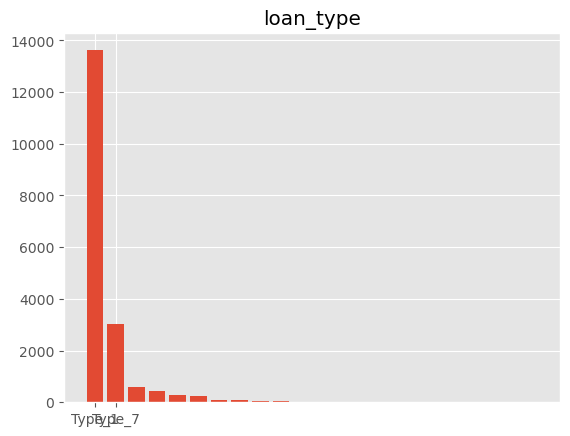

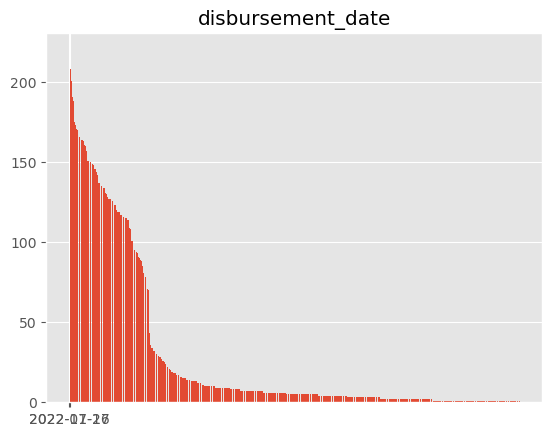

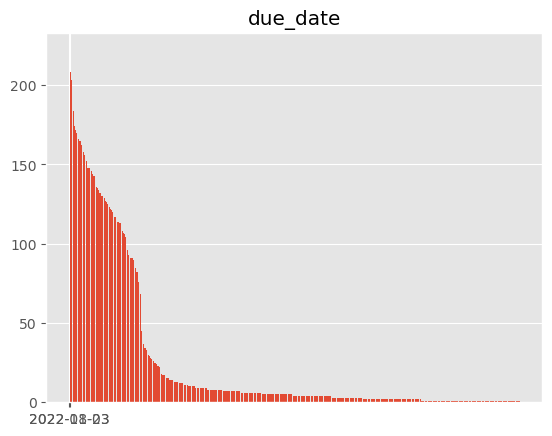

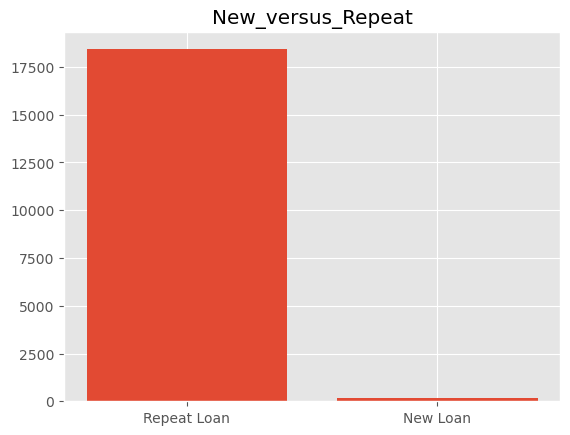

In [14]:
list_cols = ['loan_type','disbursement_date', 'due_date', 'New_versus_Repeat']

for col in list_cols:
    plt.style.use('ggplot')
    fig1 = plt.figure()
    ax = fig1.add_subplot()
    ax.bar( data_test[col].unique(), data_test[col].value_counts())
    ax.set_xticks([0,1])
    ax.set_title(col)

lenders = data.groupby('lender_id')['target'].value_counts()
lenders.unstack().plot(kind='bar', stacked=True, figsize=(10,8))
for lender in data['lender_id'].unique():
    lender_loans = data[data['lender_id']==lender]
    print(f'Loan default rate for {lender} is ', lender_loans['target'].mean())

repeating = data.groupby('New_versus_Repeat')['target'].value_counts()
repeating.unstack().plot(kind='bar', stacked=True)

for repeat_or_new in data['New_versus_Repeat'].unique():
    state = data[data['New_versus_Repeat']==repeat_or_new]
    print(f'The default of {repeat_or_new}s is ', state['target'].mean())

<AxesSubplot:>

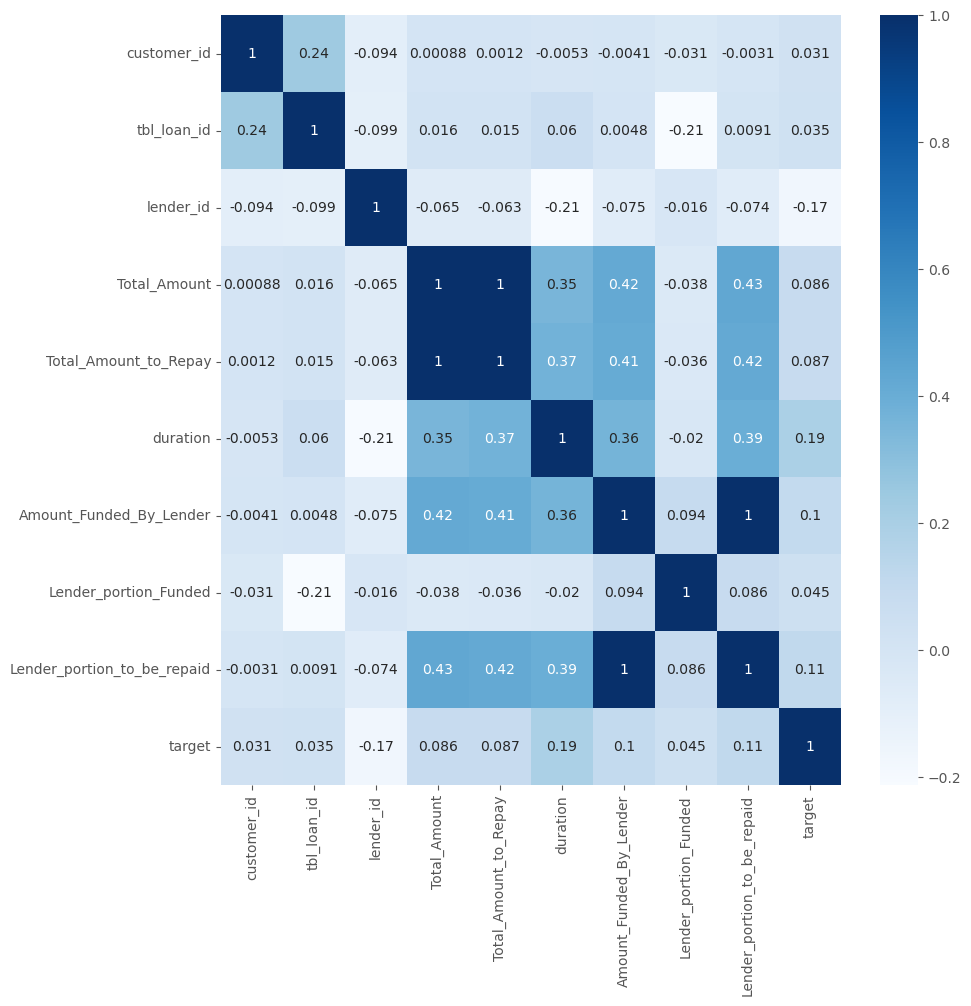

In [15]:
core = data_train.corr()
fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.heatmap(data=core, annot=True, cmap=plt.cm.Blues)

In [16]:
data_train.columns

Index(['ID', 'customer_id', 'country_id', 'tbl_loan_id', 'lender_id',
       'loan_type', 'Total_Amount', 'Total_Amount_to_Repay',
       'disbursement_date', 'due_date', 'duration', 'New_versus_Repeat',
       'Amount_Funded_By_Lender', 'Lender_portion_Funded',
       'Lender_portion_to_be_repaid', 'target'],
      dtype='object')

In [17]:
#Combine the datasets



In [18]:
X_train = data_train.copy()
y_train = X_train.pop('target')

X_test = data_test.copy()

X = data.drop('target', axis=1)


In [19]:
cat_col = ['lender_id', 'New_versus_Repeat']
num_col = ['duration', 'Amount_Funded_By_Lender', 'Total_Amount','customer_id', 'tbl_loan_id', 'Lender_portion_to_be_repaid', 'Total_Amount_to_Repay' ]
date_col = ['disbursement_date', 'due_date']
to_use_robust = []#, 'Lender_portion_Funded']
X[cat_col] = X[cat_col].astype(object)
X[num_col] = X[num_col].astype(float)
X['customer_id'] = X['customer_id'].astype(object)

In [20]:
#X_train = X_train.drop([ 'tbl_loan_id'], axis=1).copy()
#X_test = X_test.drop([ 'tbl_loan_id'], axis=1).copy()
#X = X.drop('ID', axis=1).copy()

In [21]:
for col in date_col:
    X[col] = pd.to_datetime(X[col])




In [22]:
X.head()

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid
0,ID_266671248032267278,266671.0,Kenya,248032.0,267278,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,7.0,Repeat Loan,120.85,0.014305,121.0
1,ID_248919228515267278,248919.0,Kenya,228515.0,267278,Type_1,25895.0,25979.0,2022-07-30,2022-08-06,7.0,Repeat Loan,7768.50,0.300000,7794.0
2,ID_308486370501251804,308486.0,Kenya,370501.0,251804,Type_7,6900.0,7142.0,2024-09-06,2024-09-13,7.0,Repeat Loan,1380.00,0.200000,1428.0
3,ID_266004285009267278,266004.0,Kenya,285009.0,267278,Type_1,8958.0,9233.0,2022-10-20,2022-10-27,7.0,Repeat Loan,2687.40,0.300000,2770.0
4,ID_253803305312267278,253803.0,Kenya,305312.0,267278,Type_1,4564.0,4728.0,2022-11-28,2022-12-05,7.0,Repeat Loan,1369.20,0.300000,1418.0


In [23]:
X['disbursement_year'] = X['disbursement_date'].apply(lambda x: x.year).astype(str)
X['disbursement_month'] = X['disbursement_date'].apply(lambda x: x.month).astype(str)
X['disbursement_day'] = X['disbursement_date'].apply(lambda x: x.day)


X['due_year'] = X['due_date'].apply(lambda x: x.year).astype(str)
X['due_month'] = X['due_date'].apply(lambda x: x.month).astype(str)
X['due_day'] = X['due_date'].apply(lambda x: x.day)

X['interest_rate'] = ((X['Total_Amount_to_Repay']-X['Total_Amount'])/X['Total_Amount'])*100

cat_col = ['disbursement_year', 'due_year']+ cat_col
num_col = ['disbursement_month', 'disbursement_day','due_month','due_day', 'interest_rate']+num_col #, 'interest_rate', 'previous_loan_counts_for_customer', 'previous_max_total_amount_for_customer', 'time_from_first_loan', 'lower_than_highest']+num_col


In [24]:
X

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,...,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,disbursement_year,disbursement_month,disbursement_day,due_year,due_month,due_day,interest_rate
0,ID_266671248032267278,266671.0,Kenya,248032.0,267278,Type_1,8448.00,8448.00,2022-08-30,2022-09-06,...,120.85,0.014305,121.00,2022,8,30,2022,9,6,0.000000
1,ID_248919228515267278,248919.0,Kenya,228515.0,267278,Type_1,25895.00,25979.00,2022-07-30,2022-08-06,...,7768.50,0.300000,7794.00,2022,7,30,2022,8,6,0.324387
2,ID_308486370501251804,308486.0,Kenya,370501.0,251804,Type_7,6900.00,7142.00,2024-09-06,2024-09-13,...,1380.00,0.200000,1428.00,2024,9,6,2024,9,13,3.507246
3,ID_266004285009267278,266004.0,Kenya,285009.0,267278,Type_1,8958.00,9233.00,2022-10-20,2022-10-27,...,2687.40,0.300000,2770.00,2022,10,20,2022,10,27,3.069882
4,ID_253803305312267278,253803.0,Kenya,305312.0,267278,Type_1,4564.00,4728.00,2022-11-28,2022-12-05,...,1369.20,0.300000,1418.00,2022,11,28,2022,12,5,3.593339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87243,ID_297596365331297183,297596.0,Ghana,365331.0,297183,Type_3,1730.41,1782.32,2023-02-09,2023-02-16,...,269.41,0.155689,279.77,2023,2,9,2023,2,16,2.999867
87244,ID_259715231897267278,259715.0,Kenya,231897.0,267278,Type_1,1534.00,1534.00,2022-08-04,2022-08-11,...,460.20,0.300000,460.00,2022,8,4,2022,8,11,0.000000
87245,ID_296701364008297183,296701.0,Ghana,364008.0,297183,Type_3,1372.21,1413.30,2022-06-23,2022-06-30,...,178.67,0.130208,178.67,2022,6,23,2022,6,30,2.994440
87246,ID_268271242864267278,268271.0,Kenya,242864.0,267278,Type_1,5608.00,5781.00,2022-08-23,2022-08-30,...,0.00,0.000000,0.00,2022,8,23,2022,8,30,3.084879


### Add Economic Data

In [25]:
split_df_train = X[['country_id', 'disbursement_year']]


def get_econ_data_for_country(row, indicator):
    
    kenya_indicators = {'inflation':2 ,'unemployment_rate':26, 'deposit_rate':14, 'exchange_rate':5}
    idx = kenya_indicators[indicator]

    country_name = row['country_id']
    year = int(row['disbursement_year'])

    if country_name != 'Kenya':
        idx = idx-2
    
    
    if year>2023:
        year = 'YR2023'
 
        return data_econ[year][(data_econ['Country']==country_name)][idx]
    else:
        year = 'YR'+str(year)
        
        return  data_econ[year][(data_econ['Country']==country_name)][idx]
    
indicator_list = ['inflation','unemployment_rate', 'deposit_rate', 'exchange_rate']
    
for indicator in indicator_list:
    X[indicator] = split_df_train.apply(lambda row: get_econ_data_for_country(row, indicator), axis=1)
    num_col.append(indicator)




### Amounts in USD to ensure equivalent comparison

In [26]:
X['Total_Amount'] = X['Total_Amount']/X['exchange_rate']
X['Total_Amount_to_Repay'] = X['Total_Amount_to_Repay']/X['exchange_rate']
X['Amount_Funded_By_Lender'] = X['Amount_Funded_By_Lender']/X['exchange_rate']


In [27]:
def max_previous_loan(row,df):
    disburse_date = row['disbursement_date']
    customer= row['customer_id']
    max_previous_loans = df['Total_Amount'][(df['customer_id']==customer)&(df['disbursement_date']<disburse_date)].max()
    return max_previous_loans

X['previous_max_total_amount_for_customer'] = X.apply(lambda row: max_previous_loan(row, X), axis=1)

num_col.append('previous_max_total_amount_for_customer')

In [28]:
def number_of_previous_loan(row, df):
    disburse_date = row['disbursement_date']
    customer= row['customer_id']
    previous_loans = df['Total_Amount'][(df['customer_id']==customer)&(df['disbursement_date']<disburse_date)].count()
    return previous_loans

X['previous_loan_counts_for_customer'] = X.apply(lambda row: number_of_previous_loan(row, X), axis=1)
num_col.append('previous_loan_counts_for_customer')

In [29]:
def number_of_previous_loan_three_months(row, df):
    disburse_date = row['disbursement_date']
    customer= row['customer_id']
    three_months_before = disburse_date-pd.Timedelta(days=30)
    previous_loans_three_months = df['Total_Amount'][(df['customer_id']==customer)&(df['disbursement_date']>(three_months_before))].count()
    return previous_loans_three_months

X['previous_loan_counts_for_customer_last_three_months'] = X.apply(lambda row: number_of_previous_loan_three_months(row, X), axis=1)
num_col.append('previous_loan_counts_for_customer_last_three_months')

In [30]:
def number_of_loans_before_due_date(row, df):
    due_date = row['due_date']
    disburse_date = row['disbursement_date']
    customer= row['customer_id']
    number_of_loans = df['ID'][(df['customer_id']==customer)&(df['due_date']>disburse_date)&(df['disbursement_date']<due_date)].count()
    
    return number_of_loans

X['active_number_of_loans_before_due_date'] = X.apply(lambda row: number_of_loans_before_due_date(row, X), axis=1)
num_col.append('active_number_of_loans_before_due_date')

In [31]:
def total_of_loans_before_due_date(row, df):
    due_date = row['due_date']
    disburse_date = row['disbursement_date']
    customer= row['customer_id']
    tbl_loan_id = row['tbl_loan_id']
    total_of_loans = df['Total_Amount'][(df['customer_id']==customer)&(df['due_date']>disburse_date)&(df['disbursement_date']<due_date)&(df['tbl_loan_id']!=tbl_loan_id)].sum()
    
    return total_of_loans

X['active_total_of_loans_before_due_date'] = X.apply(lambda row: total_of_loans_before_due_date(row, X), axis=1)
num_col.append('active_total_of_loans_before_due_date')

In [32]:
def time_from_first_loan(row, df):
    disburse_date = row['disbursement_date']
    customer= row['customer_id']
    time_from_loans = (row['disbursement_date']-df['disbursement_date'][(df['customer_id']==customer)&(df['disbursement_date']<disburse_date)].min())
    return time_from_loans.days

X['time_from_first_loan'] = X.apply(lambda row: time_from_first_loan(row, X), axis=1)
X['time_from_first_loan'] = pd.to_numeric(X['time_from_first_loan'])
num_col.append('time_from_first_loan')

In [33]:
def previous_loan_type(row, df):
    disburse_date = row['disbursement_date']
    customer= row['customer_id']
    type_of_loans = (df['loan_type'][(df['customer_id']==customer)&(df['disbursement_date']<disburse_date)].nunique())
    return type_of_loans

X['previous_loan_type'] = X.apply(lambda row: previous_loan_type(row, X), axis=1)
X['previous_loan_type'] = pd.to_numeric(X['previous_loan_type'])
num_col.append('previous_loan_type')


In [34]:





#num_col = ['loan_type','interest_rate', 'previous_loan_counts_for_customer','active_number_of_loans_before_due_date', 'previous_max_total_amount_for_customer', 'time_from_first_loan','inflation','unemployment_rate', 'deposit_rate', 'exchange_rate','real_interest_rate', 'previous_real_interest_rate', 'Amount_per_day', 'previous_real_interest_rate_dif']+num_col

In [35]:
X['Amount_per_day'] = X['Total_Amount']/X['duration']


num_col.append('Amount_per_day')

In [36]:
X['real_interest_rate'] = np.around((1+X['inflation']/100)/(1-X['interest_rate']/100)-1, 4)

X['real_interest_rate'][X['real_interest_rate']>10]=10
num_col.append('real_interest_rate')

C:\Users\munod\AppData\Local\Temp\ipykernel_50712\4218069496.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['real_interest_rate'][X['real_interest_rate']>10]=10


In [37]:
def previous_real_interest_rate(row,df):
    disburse_date = row['disbursement_date']
    customer= row['customer_id']
    previous_loans_real_interest = df['real_interest_rate'][(df['customer_id']==customer)&(df['disbursement_date']<disburse_date)].max()
    return previous_loans_real_interest

X['previous_real_interest_rate'] = X.apply(lambda row: previous_real_interest_rate(row, X), axis=1)

num_col.append('previous_real_interest_rate')

In [38]:
X['week_day'] = X['disbursement_date'].map(lambda x: x.weekday())
X['week_day'] = X['week_day'].astype(str)
cat_col.append('week_day')

In [57]:

X['previous_real_interest_rate_dif'] = X['previous_real_interest_rate']-X['real_interest_rate']
num_col.append('previous_real_interest_rate_dif')

In [40]:
def t_encode(col, X, X_train, X_test):
    
    k_fold = KFold(n_splits=3, shuffle=True, random_state=RSEED)
    t_encorder = TargetEncoder()
    X_train[col] = X[col].loc[X_train.index]
    X_test[col] = X[col].loc[X_test.index]
    X_train_customer_id_type = X_train[col]
    X_test_customer_id_type = X_test[col]

    X_train_customer_id_type_encoded = np.zeros(X_train.shape[0])
    X_test_customer_id_type_encoded = np.zeros(X_test.shape[0])

    counter = 0
    for train_index, test_index in k_fold.split(X_train_customer_id_type):
        t_encoder_X_train, t_encoder_X_test = X_train_customer_id_type.iloc[train_index], X_train_customer_id_type.iloc[test_index]
        t_encoder_y_train, t_encoder_y_test = y_train.iloc[train_index], y_train.iloc[test_index]

        t_encorder.fit(t_encoder_X_train, t_encoder_y_train)
        X_train_customer_id_type_encoded[test_index] = t_encorder.transform(t_encoder_X_test).values.ravel()
        counter +=1
        if counter >2:
            X_test_customer_id_type_encoded = t_encorder.transform(X_test_customer_id_type).values.ravel()



    X_train[col] = X_train_customer_id_type_encoded
    X_test[col] = X_test_customer_id_type_encoded

    X = X.drop(col, axis=1)

    X[col] = pd.concat([X_train[col], X_test[col]]).reset_index(drop=True)
    X[col] = X[col].astype(float)

    return X[col]

X['disbursement_month'] = t_encode('disbursement_month', X, X_train, X_test)
num_col.append('disbursement_month')
X['due_month'] = t_encode('due_month', X, X_train, X_test)
num_col.append('due_month')

k_fold = KFold(n_splits=3, shuffle=True, random_state=RSEED)
t_encorder = TargetEncoder()
X_train['tbl_loan_id'] = X_train['tbl_loan_id'].astype(object)
X_test['tbl_loan_id'] = X_test['tbl_loan_id'].astype(object)
X_train_customer_id_type = X_train['tbl_loan_id']
X_test_customer_id_type = X_test['tbl_loan_id']

X_train_customer_id_type_encoded = np.zeros(X_train.shape[0])
X_test_customer_id_type_encoded = np.zeros(X_test.shape[0])

counter = 0
for train_index, test_index in k_fold.split(X_train_customer_id_type):
    t_encoder_X_train, t_encoder_X_test = X_train_customer_id_type.iloc[train_index], X_train_customer_id_type.iloc[test_index]
    t_encoder_y_train, t_encoder_y_test = y_train.iloc[train_index], y_train.iloc[test_index]

    t_encorder.fit(t_encoder_X_train, t_encoder_y_train)
    X_train_customer_id_type_encoded[test_index] = t_encorder.transform(t_encoder_X_test).values.ravel()
    counter +=1
    if counter >2:
        X_test_customer_id_type_encoded = t_encorder.transform(X_test_customer_id_type).values.ravel()



X_train['tbl_loan_id'] = X_train_customer_id_type_encoded
X_test['tbl_loan_id'] = X_test_customer_id_type_encoded

X = X.drop('tbl_loan_id', axis=1)

X['tbl_loan_id'] = pd.concat([X_train['tbl_loan_id'], X_test['tbl_loan_id']]).reset_index(drop=True)
X['tbl_loan_id'] = X['tbl_loan_id'].astype(float)

In [41]:
#X['tbl_loan_id'] = X['tbl_loan_id'].astype(float)

k_fold = KFold(n_splits=3, shuffle=True, random_state=RSEED)
t_encorder = TargetEncoder()
X_train['customer_id'] = X_train['customer_id'].astype(object)
X_test['customer_id'] = X_test['customer_id'].astype(object)
X_train_customer_id_type = X_train['customer_id']
X_test_customer_id_type = X_test['customer_id']

X_train_customer_id_type_encoded = np.zeros(X_train.shape[0])
X_test_customer_id_type_encoded = np.zeros(X_test.shape[0])

counter = 0
for train_index, test_index in k_fold.split(X_train_customer_id_type):
    t_encoder_X_train, t_encoder_X_test = X_train_customer_id_type.iloc[train_index], X_train_customer_id_type.iloc[test_index]
    t_encoder_y_train, t_encoder_y_test = y_train.iloc[train_index], y_train.iloc[test_index]

    t_encorder.fit(t_encoder_X_train, t_encoder_y_train)
    X_train_customer_id_type_encoded[test_index] = t_encorder.transform(t_encoder_X_test).values.ravel()
    counter +=1
    if counter >2:
        X_test_customer_id_type_encoded = t_encorder.transform(X_test_customer_id_type).values.ravel()



X_train['customer_id'] = X_train_customer_id_type_encoded
X_test['customer_id'] = X_test_customer_id_type_encoded

X = X.drop('customer_id', axis=1)

X['customer_id'] = pd.concat([X_train['customer_id'], X_test['customer_id']]).reset_index(drop=True)
X['customer_id'] = X['customer_id'].astype(float)


In [42]:
#X['customer_id'] = X['customer_id'].astype(float)

In [43]:
k_fold = KFold(n_splits=3, shuffle=True, random_state=RSEED)
t_encorder = TargetEncoder()
X_train_loan_type = X_train['loan_type']
X_test_loan_type = X_test['loan_type']

X_train_loan_type_encoded = np.zeros(X_train.shape[0])
X_test_loan_type_encoded = np.zeros(X_test.shape[0])

counter = 0
for train_index, test_index in k_fold.split(X_train_loan_type):
    t_encoder_X_train, t_encoder_X_test = X_train_loan_type.iloc[train_index], X_train_loan_type.iloc[test_index]
    t_encoder_y_train, t_encoder_y_test = y_train.iloc[train_index], y_train.iloc[test_index]

    t_encorder.fit(t_encoder_X_train, t_encoder_y_train)
    X_train_loan_type_encoded[test_index] = t_encorder.transform(t_encoder_X_test).values.ravel()
    counter += 1
    if counter >2:
        X_test_loan_type_encoded = t_encorder.transform(X_test_loan_type).values.ravel()
    



X_train['loan_type'] = X_train_loan_type_encoded
X_test['loan_type'] = X_test_loan_type_encoded

X['loan_type'] = pd.concat([X_train['loan_type'], X_test['loan_type']]).reset_index(drop=True)
num_col.append('loan_type')

In [44]:
def loan_lower_than_highest_repaid(loan_row):

    loan = loan_row["Total_Amount"]
    highest_loan_repaid = data["Total_Amount"][(data['customer_id']==loan_row['customer_id'])].max()
    if loan< highest_loan_repaid:
        return 0
    else:
        return 1



X["lower_than_highest"] = X.apply(loan_lower_than_highest_repaid, axis=1)

cat_col.append('lower_than_highest')

In [45]:
skewed_num_col = [ 
    #'interest_rate',
    'Total_Amount',
    'Total_Amount_to_Repay',
    'duration',
    'Amount_Funded_By_Lender',
    'Lender_portion_Funded'
 ]

def limit_upper_outliers(df, cols):
    for col in cols:
        upper_limit = (df[col].mean()+3*df[col].std())
        df[col] = df[col].apply(lambda x: x if x <upper_limit else upper_limit)
        if col == 'interest_rate':
            lower_limit = (df[col].mean() - 3*df[col].std())
            df[col] = df[col].apply(lambda x: x if x > lower_limit else lower_limit)
            return df
        else:
            return df
        
X = limit_upper_outliers(X, skewed_num_col)


In [46]:
X['interest_per_day'] = X['interest_rate']/X['duration']
num_col.append('interest_per_day')

In [47]:
X['Total_Amount_to_Repay'] = np.sqrt(X['Total_Amount_to_Repay'])

- Payment history (35%) number of previous loans repaid, amount of previous loans repaid, 
- Amount owed (30%) open loans, total amount open loans,
- Length of credit history (15%) time from first loan
- New credit (10%) Number of loans in the previous 3 months
- Credit mix (10%) Mix of loan types

In [48]:
max_number = X['previous_loan_counts_for_customer'].max()
X['fico_score_payment_history'] = 280*X['previous_loan_counts_for_customer']/max_number
num_col.append('fico_score_payment_history')

In [49]:
max_number_active_loan = X['active_number_of_loans_before_due_date'].max()
max_toatla_amount_active_loan = X['active_total_of_loans_before_due_date']
X['fico_score_amount_owed'] = 240-120*(X['active_number_of_loans_before_due_date']/max_number_active_loan+X['active_total_of_loans_before_due_date']/max_toatla_amount_active_loan)
num_col.append('fico_score_amount_owed')

In [50]:
max_time_from_first_loan = X['time_from_first_loan'].max()
X['fico_time_from_first_loan'] = 120*(X['time_from_first_loan']/max_time_from_first_loan)
num_col.append('fico_time_from_first_loan')

In [51]:
max_previous_number_three_months = X['previous_loan_counts_for_customer_last_three_months'].max()
X['fico_score_previous_loan_counts_for_customer_last_three_months'] = 80 - 80*X['previous_loan_counts_for_customer_last_three_months']/max_previous_number_three_months
num_col.append('fico_score_previous_loan_counts_for_customer_last_three_months')

In [52]:
max_types = X['previous_loan_type'].max()
X['fico_score_previous_loan_type'] = 80*(X['previous_loan_type']/max_types)
num_col.append('fico_score_previous_loan_type')

In [53]:
X['fico'] = (X['fico_score_payment_history'] + X['fico_score_amount_owed']+X['fico_time_from_first_loan']+X['fico_score_previous_loan_counts_for_customer_last_three_months']+X['fico_score_previous_loan_type'])
num_col.append('fico')

In [54]:
#num_col = ['interest_per_day', 'fico_score_amount_owed', 'fico_time_from_first_loan', 'fico_score_previous_loan_counts_for_customer_last_three_months', 'fico'] +num_col

In [55]:
#num_col = ['previous_loan_counts_for_customer_last_three_months','active_number_of_loans_before_due_date','previous_loan_type']+ num_col

<AxesSubplot:>

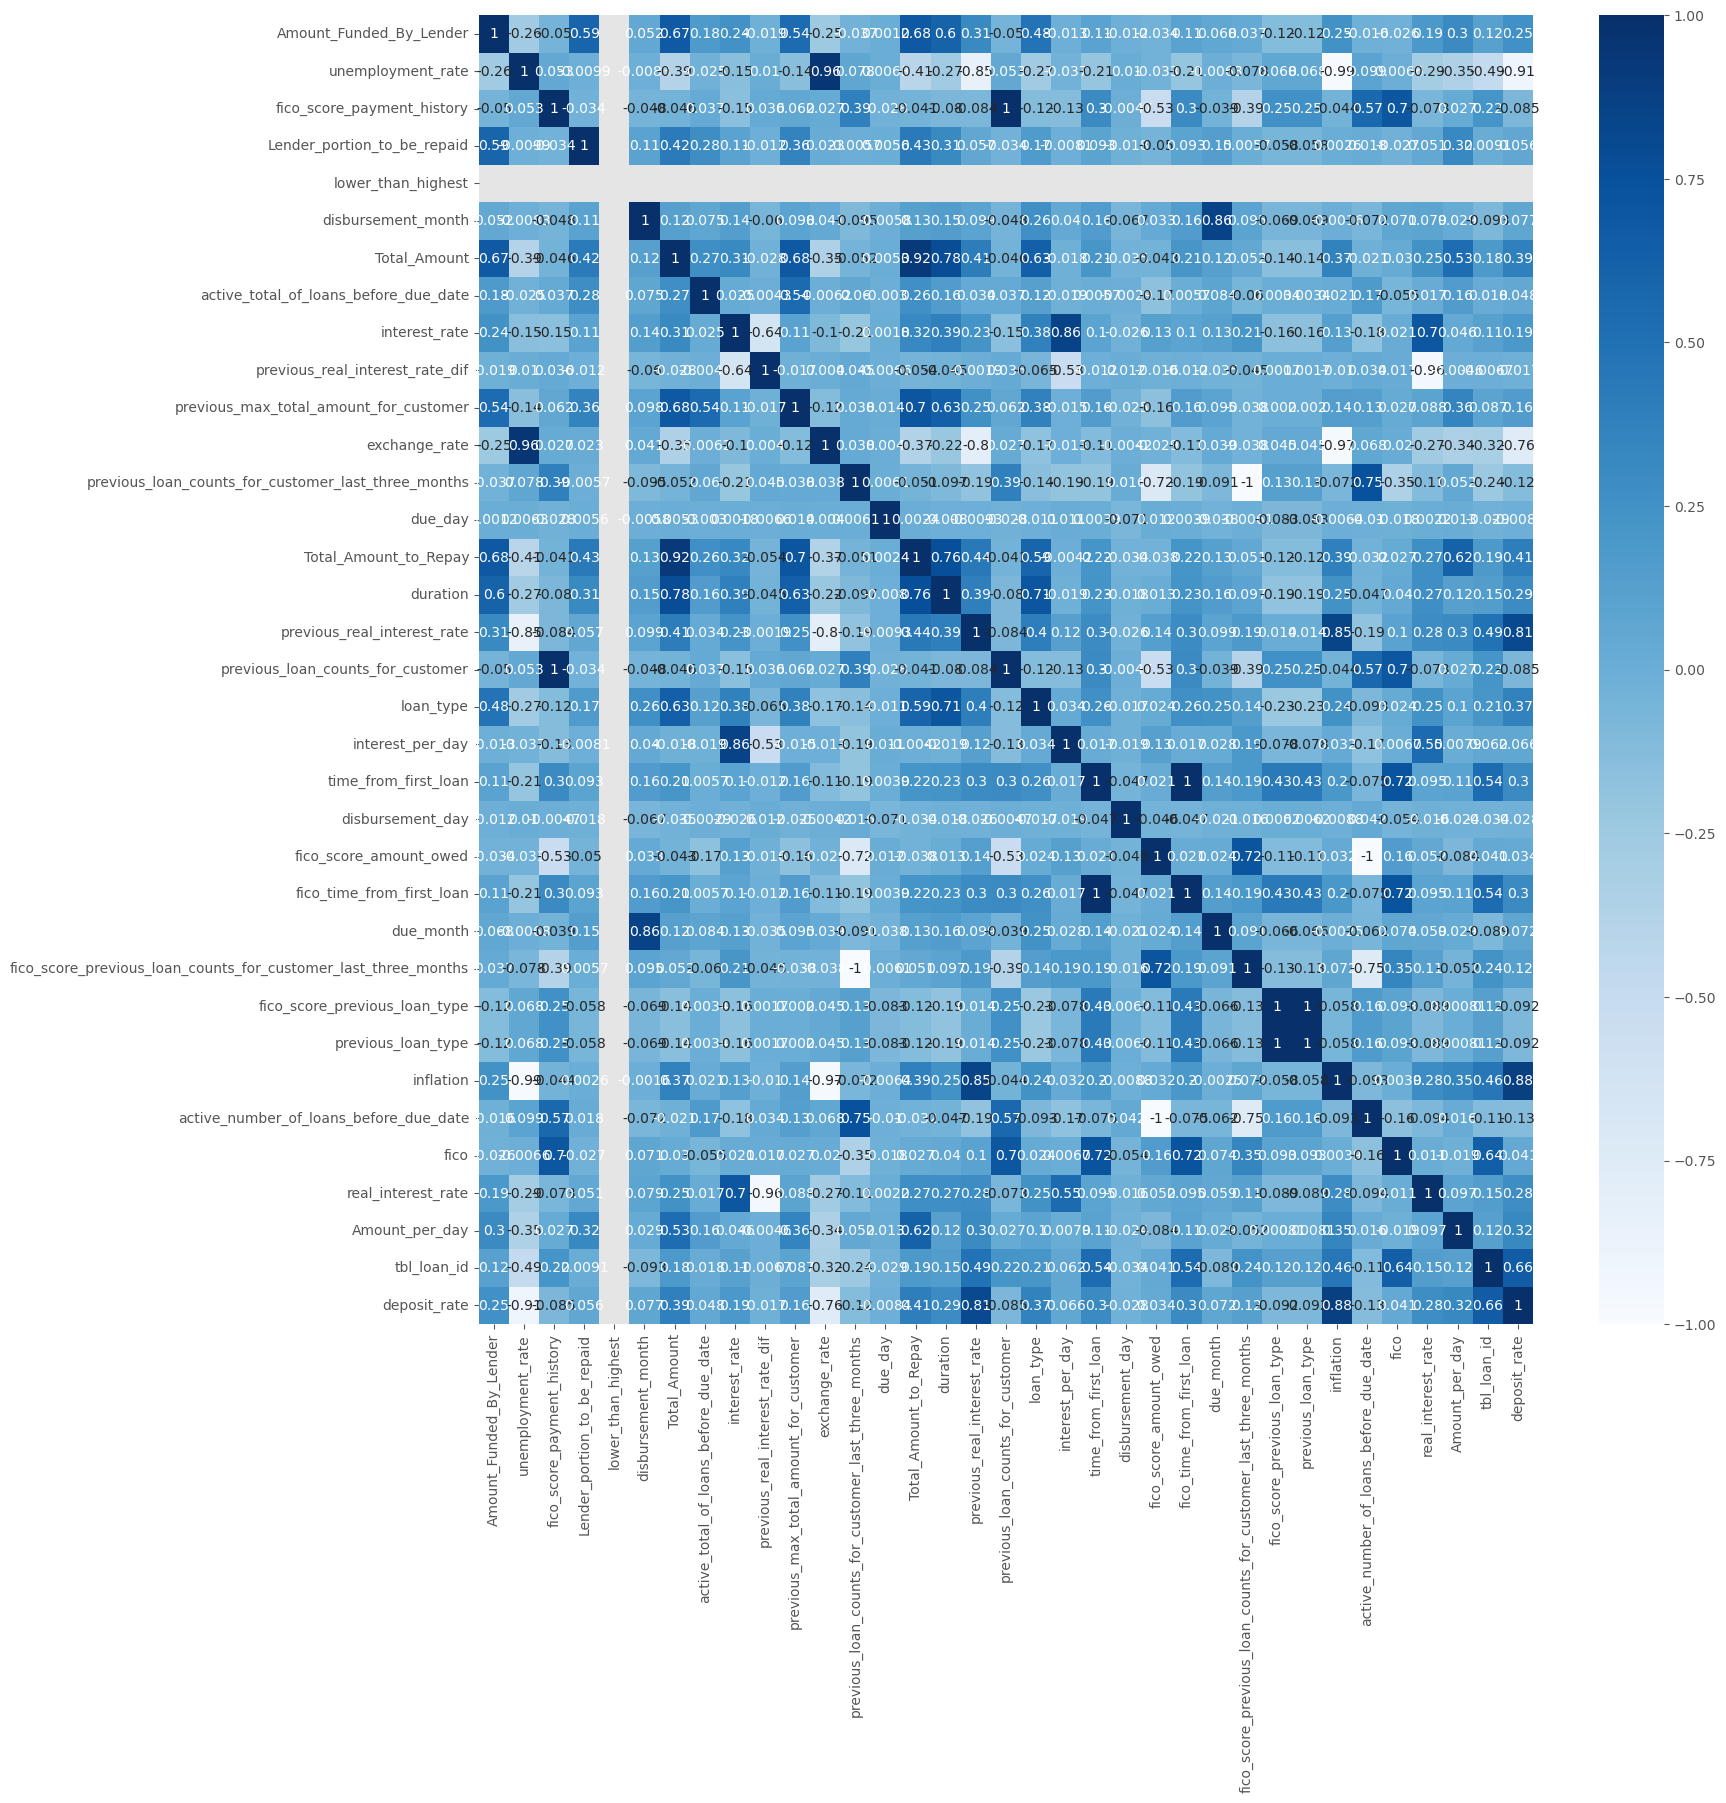

In [58]:
num_col = list(set(num_col)-{'previous_real_interest_rate_diff'})
cor_map = X[num_col].corr()
fig, ax = plt.subplots(1,1, figsize=(17,17))
sns.heatmap(cor_map, annot=True, cmap=plt.cm.Blues, ax=ax)

In [59]:
corr_pairs = cor_map.stack()
high_corr_pairs = corr_pairs[(corr_pairs>0.90)|(corr_pairs<-0.95)]
#high_corr_pairs = high_corr_pairs[high_corr_pairs!=1]
high_corr_pairs_list = []

for col_pair in high_corr_pairs.index:
    if col_pair[0] == col_pair[1]:
        continue
    elif col_pair[::-1] in high_corr_pairs_list:
        continue
    else:
        high_corr_pairs_list.append(col_pair)

high_corr_pairs_list

[('unemployment_rate', 'exchange_rate'),
 ('unemployment_rate', 'inflation'),
 ('fico_score_payment_history', 'previous_loan_counts_for_customer'),
 ('Total_Amount', 'Total_Amount_to_Repay'),
 ('previous_real_interest_rate_dif', 'real_interest_rate'),
 ('exchange_rate', 'inflation'),
 ('previous_loan_counts_for_customer_last_three_months',
  'fico_score_previous_loan_counts_for_customer_last_three_months'),
 ('time_from_first_loan', 'fico_time_from_first_loan'),
 ('fico_score_amount_owed', 'active_number_of_loans_before_due_date'),
 ('fico_score_previous_loan_type', 'previous_loan_type')]

In [60]:
X.tail()

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,...,week_day,previous_real_interest_rate_dif,lower_than_highest,interest_per_day,fico_score_payment_history,fico_score_amount_owed,fico_time_from_first_loan,fico_score_previous_loan_counts_for_customer_last_three_months,fico_score_previous_loan_type,fico
87243,ID_297596365331297183,297596.0,Ghana,365331.0,297183,0.018374,157.018683,12.717273,2023-02-09,2023-02-16,...,3,0.0000,0,0.428552,49.477912,NaN,22.614379,77.460317,26.666667,NaN
87244,ID_259715231897267278,259715.0,Kenya,231897.0,267278,0.008380,13.014781,3.607600,2022-08-04,2022-08-11,...,3,0.0000,0,0.000000,8.995984,101.333333,2.875817,67.619048,26.666667,207.490849
87245,ID_296701364008297183,296701.0,Ghana,364008.0,297183,0.018374,165.878101,13.070777,2022-06-23,2022-06-30,...,3,0.0001,0,0.427777,6.746988,NaN,8.758170,71.428571,26.666667,NaN
87246,ID_268271242864267278,268271.0,Kenya,242864.0,267278,0.008380,47.579459,7.003373,2022-08-23,2022-08-30,...,1,0.0058,0,0.440697,2.248996,NaN,4.575163,77.460317,26.666667,NaN
87247,ID_248929241821267278,248929.0,Kenya,241821.0,267278,0.008380,34.259247,5.853140,2022-08-22,2022-08-29,...,0,0.0154,0,0.000000,22.489960,98.666667,4.967320,66.984127,26.666667,219.774740


In [61]:

X = X.fillna(0)


def binary_encode(df, column_name, positive_value):
    df[column_name] = df[column_name].apply(lambda x: 1 if x == positive_value else 0)
    return df
X_train = binary_encode(X_train, 'New_versus_Repeat', 'New Loan')
X_test = binary_encode(X_test, 'New_versus_Repeat', 'New Loan')

In [62]:
display(X.isna().sum())

ID                                                                0
customer_id                                                       0
country_id                                                        0
tbl_loan_id                                                       0
lender_id                                                         0
loan_type                                                         0
Total_Amount                                                      0
Total_Amount_to_Repay                                             0
disbursement_date                                                 0
due_date                                                          0
duration                                                          0
New_versus_Repeat                                                 0
Amount_Funded_By_Lender                                           0
Lender_portion_Funded                                             0
Lender_portion_to_be_repaid                     

In [63]:
for col in X.columns:
    if X[col].dtype == 'datetime64[ns]':
        X[col] = X[col].astype(str)
    print(X[col].dtype, col)

object ID
float64 customer_id
object country_id
float64 tbl_loan_id
int64 lender_id
float64 loan_type
float64 Total_Amount
float64 Total_Amount_to_Repay
object disbursement_date
object due_date
float64 duration
object New_versus_Repeat
float64 Amount_Funded_By_Lender
float64 Lender_portion_Funded
float64 Lender_portion_to_be_repaid
object disbursement_year
float64 disbursement_month
int64 disbursement_day
object due_year
float64 due_month
int64 due_day
float64 interest_rate
float64 inflation
float64 unemployment_rate
float64 deposit_rate
float64 exchange_rate
float64 previous_max_total_amount_for_customer
int64 previous_loan_counts_for_customer
int64 previous_loan_counts_for_customer_last_three_months
int64 active_number_of_loans_before_due_date
float64 active_total_of_loans_before_due_date
float64 time_from_first_loan
int64 previous_loan_type
float64 Amount_per_day
float64 real_interest_rate
float64 previous_real_interest_rate
object week_day
float64 previous_real_interest_rate_dif
in

In [64]:
X = X.fillna(0)

real_interest_rate                                                0.070148
interest_rate                                                     0.068413
interest_per_day                                                  0.052485
previous_real_interest_rate_dif                                   0.043144
previous_loan_counts_for_customer_last_three_months               0.030865
fico_score_previous_loan_counts_for_customer_last_three_months    0.029910
tbl_loan_id                                                       0.020782
due_date                                                          0.020164
disbursement_date                                                 0.019505
customer_id                                                       0.019419
loan_type                                                         0.016912
Amount_Funded_By_Lender                                           0.016529
previous_max_total_amount_for_customer                            0.015802
Lender_portion_to_be_repa

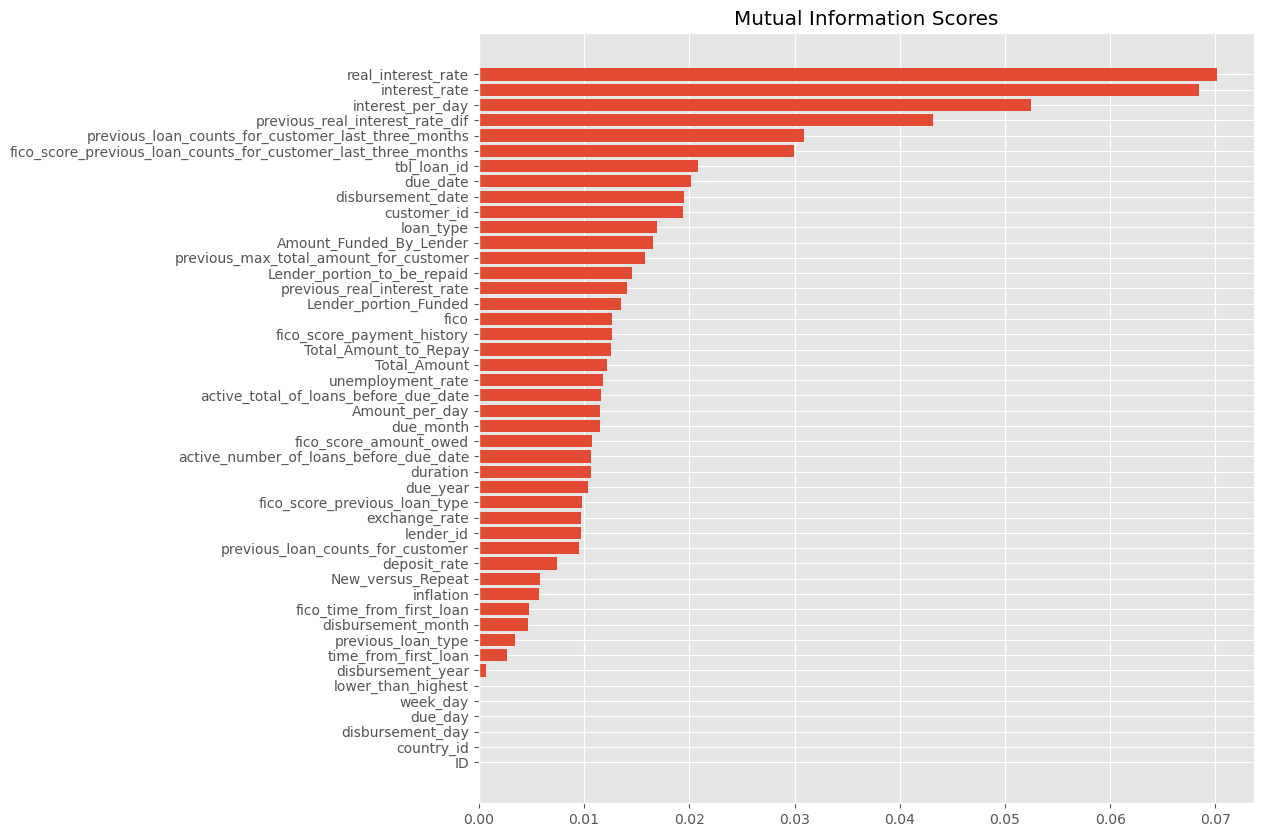

In [65]:
X_train = X[X['ID'].isin(X_train['ID'].unique())]




def make_mi_scores(df, y):
    df = df.copy()
    for colname in df.select_dtypes(["object", "category"]):
        df[colname], _ = df[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(df, y, discrete_features=discrete_features, random_state=RSEED)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.subplots(1,1, figsize=(10,10))
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

mi_scores = make_mi_scores(X_train,y_train )
print(mi_scores)
plot_mi_scores(mi_scores)

In [66]:
for col in date_col:
    X[col] = pd.to_datetime(X[col])

### Feature Selection

In [88]:
min_mi_score = 0.006

features_mi_less_than_min = list(mi_scores[mi_scores<min_mi_score].index) # Remove features with mi scores less than 0.01
print(cat_col)
print(len(cat_col))
print(num_col)
print(len(num_col))

def remove_features(list_of_features):
    for feature in list_of_features:
        if feature in cat_col:
            cat_col.remove(feature)
        if feature in num_col:
            num_col.remove(feature)
    
remove_features(features_mi_less_than_min)
remove_features(['Amount_Funded_By_Lender', 'Total_Amount_to_Repay'])
print(cat_col)
print(len(cat_col))
print(num_col)
print(len(num_col))

['due_year', 'lender_id', 'New_versus_Repeat']
3
['unemployment_rate', 'fico_score_payment_history', 'customer_id', 'Lender_portion_to_be_repaid', 'active_total_of_loans_before_due_date', 'interest_rate', 'previous_max_total_amount_for_customer', 'previous_loan_counts_for_customer_last_three_months', 'duration', 'loan_type', 'interest_per_day', 'fico_score_amount_owed', 'due_month', 'fico_score_previous_loan_type', 'fico', 'real_interest_rate', 'Amount_per_day', 'tbl_loan_id', 'deposit_rate']
19
['due_year', 'lender_id']
2
['unemployment_rate', 'fico_score_payment_history', 'customer_id', 'Lender_portion_to_be_repaid', 'active_total_of_loans_before_due_date', 'interest_rate', 'previous_max_total_amount_for_customer', 'previous_loan_counts_for_customer_last_three_months', 'duration', 'loan_type', 'interest_per_day', 'fico_score_amount_owed', 'due_month', 'fico_score_previous_loan_type', 'fico', 'real_interest_rate', 'Amount_per_day', 'tbl_loan_id', 'deposit_rate']
19


In [89]:
print(cat_col)
print(len(cat_col))
print(num_col)
print(len(num_col))

high_corr_pairs_to_remove = []
features_mi_more_than_min = list(mi_scores.sort_values(ascending=True).index)
for feature in features_mi_more_than_min:
    if feature == 'unemployment_rate':
        continue
    for pair in high_corr_pairs_list:

        if feature in pair:
            high_corr_pairs_list.remove(pair)
            high_corr_pairs_to_remove.append(feature)

remove_features(high_corr_pairs_to_remove)
remove_features(['previous_real_interest_rate'])

print(cat_col)
print(len(cat_col))
print(num_col)
print(len(num_col))

['due_year', 'lender_id']
2
['unemployment_rate', 'fico_score_payment_history', 'customer_id', 'Lender_portion_to_be_repaid', 'active_total_of_loans_before_due_date', 'interest_rate', 'previous_max_total_amount_for_customer', 'previous_loan_counts_for_customer_last_three_months', 'duration', 'loan_type', 'interest_per_day', 'fico_score_amount_owed', 'due_month', 'fico_score_previous_loan_type', 'fico', 'real_interest_rate', 'Amount_per_day', 'tbl_loan_id', 'deposit_rate']
19
['due_year', 'lender_id']
2
['unemployment_rate', 'fico_score_payment_history', 'customer_id', 'Lender_portion_to_be_repaid', 'active_total_of_loans_before_due_date', 'interest_rate', 'previous_max_total_amount_for_customer', 'previous_loan_counts_for_customer_last_three_months', 'duration', 'loan_type', 'interest_per_day', 'fico_score_amount_owed', 'due_month', 'fico_score_previous_loan_type', 'fico', 'real_interest_rate', 'Amount_per_day', 'tbl_loan_id', 'deposit_rate']
19


In [90]:
#display("Train", X_train.columns, X_train.shape, "Test", X_test.columns, X_test.shape, num_col)

In [91]:
#X_train = X_train.drop(['time_from_first_loan', 'disbursement_day', 'due_day', 'inflation' ], axis=1)

#num_col = list(set(num_col)-set(['time_from_first_loan', 'disbursement_day', 'due_day', 'inflation', 'time_from_first_loan' , 'disbursement_day', 'inflation', 'disbursement_year', 'due_year', 'unemployment_rate', 'lender_id', 'Total_Amount']))
#num_col

In [92]:
preprocessor = make_column_transformer((MinMaxScaler(), num_col), (OneHotEncoder(handle_unknown='ignore', drop='first'), cat_col))


In [93]:
display("Combined", X.shape, "Train", X_train.shape, "Test", X_test.shape)

'Combined'

(87248, 46)

'Train'

(68654, 31)

'Test'

(18594, 31)

In [94]:

X_combined_array = preprocessor.fit_transform(X)
#X_combined = pd.DataFrame(X_combined_array)

X_train = X_combined_array[:X_train.shape[0], :]
X_test = X_combined_array[X_train.shape[0]:,:]

In [95]:
display("Train", X_train.shape, "Test", X_test.shape)

'Train'

(68654, 30)

'Test'

(18594, 30)

In [96]:
from catboost import CatBoostClassifier
cat_model = CatBoostClassifier()
cat_model.fit(X_train, y_train)
y_pred = cat_model.predict(X_test)
y_pred = np.round(y_pred)
Submission = pd.DataFrame({'ID':data_test['ID'], 'target':y_pred})
Submission.to_csv("Cat_twenty_five_b.csv", index=False)
len(y_pred)


Learning rate set to 0.062689
0:	learn: 0.5329854	total: 10.5ms	remaining: 10.5s
1:	learn: 0.3709204	total: 19.9ms	remaining: 9.94s
2:	learn: 0.2629828	total: 29.4ms	remaining: 9.76s
3:	learn: 0.1973982	total: 37.6ms	remaining: 9.37s
4:	learn: 0.1503291	total: 46.5ms	remaining: 9.24s
5:	learn: 0.1155052	total: 55.4ms	remaining: 9.18s
6:	learn: 0.0925043	total: 63.9ms	remaining: 9.06s
7:	learn: 0.0740138	total: 71.8ms	remaining: 8.9s
8:	learn: 0.0608022	total: 80.9ms	remaining: 8.9s
9:	learn: 0.0506651	total: 88.7ms	remaining: 8.78s
10:	learn: 0.0432436	total: 96.9ms	remaining: 8.71s
11:	learn: 0.0378241	total: 104ms	remaining: 8.57s
12:	learn: 0.0345056	total: 112ms	remaining: 8.5s
13:	learn: 0.0317830	total: 120ms	remaining: 8.46s
14:	learn: 0.0296013	total: 128ms	remaining: 8.41s
15:	learn: 0.0275388	total: 135ms	remaining: 8.33s
16:	learn: 0.0263370	total: 144ms	remaining: 8.33s
17:	learn: 0.0246278	total: 152ms	remaining: 8.28s
18:	learn: 0.0238398	total: 160ms	remaining: 8.26s
19:

18594

In [97]:

result_list = {}
result = Submission.groupby('target')['target'].value_counts()
model_change = 'CatBoost_Classifier'+change
result

target  target
0       0         17926
1       1           668
Name: target, dtype: int64

In [98]:
#smote = SMOTE(sampling_strategy=0.3, random_state=RSEED)
#X_train, y_train = smote.fit_resample(X_train, y_train)

In [99]:
hyperparameters = {'n_estimators':[250], 'learning_rate':[ 0.15], 'max_depth':[7], 'subsample':[ 0.8, 0.9], 'colsample_bytree':[0.7], 'gamma':[0.05], 'scale_pos_weight':[10], 'random_state':[RSEED]}
grid_search_xgboostclassifier = GridSearchCV(XGBClassifier(), hyperparameters, cv=5, scoring='f1_macro', verbose=3, n_jobs=-1)
grid_search_xgboostclassifier.fit(X_train, y_train)
print(f'The Best parameters are : {grid_search_xgboostclassifier.best_params_}')
print(f'The average score is:', grid_search_xgboostclassifier.cv_results_['mean_test_score'].mean())


Fitting 5 folds for each of 2 candidates, totalling 10 fits
The Best parameters are : {'colsample_bytree': 0.7, 'gamma': 0.05, 'learning_rate': 0.15, 'max_depth': 7, 'n_estimators': 250, 'random_state': 40, 'scale_pos_weight': 10, 'subsample': 0.9}
The average score is: 0.9464291090506196


In [100]:
y_pred = grid_search_xgboostclassifier.predict(X_test)

In [101]:
Submission = pd.DataFrame({'ID':data_test['ID'], 'target': y_pred})
Submission.to_csv("XGB_CV_version_twenty_five_b.csv", index=False)

In [102]:

result = Submission.groupby('target')['target'].value_counts()
model_change = 'XGBClassifier'+change
result_list[model_change] = Submission.groupby('target')['target'].value_counts()[1][1]

result

target  target
0       0         17908
1       1           686
Name: target, dtype: int64

In [103]:
params = grid_search_xgboostclassifier.best_params_

best_model = XGBClassifier(**params)
best_model.fit(X_train, y_train)



y_pred = best_model.predict(X_test)
y_pred = np.round(y_pred)

Submission = pd.DataFrame({'ID':data_test['ID'], 'target': y_pred})
Submission.to_csv("XGB_Combined_version_twenty_five_b.csv", index=False)
print(Submission.groupby('target')['target'].value_counts())

model_change = 'Combined_XGB'+change
result_list[model_change] = Submission.groupby('target')['target'].value_counts()[1][1]

target  target
0       0         17908
1       1           686
Name: target, dtype: int64


In [104]:
model = lgb.LGBMClassifier(random_state=RSEED)

def func(num):
    if num>0.5:
        return 1
    else:
        return 0

parameter_grid = {'num_leaves':[24,31], 'learning_rate':[0.1,0.15], 'max_depth':[7,8], 'n_estimators':[375,390], 'scale_pos_weight': [6,8], 'reg_alpha':[0.0,0.05], 'reg_lambda':[0.75,0.85],'random_state':[RSEED]}
grid_search_lgboostclassifier = GridSearchCV(estimator=model, param_grid= parameter_grid, cv=5, scoring='f1_macro', verbose=3, n_jobs=-1)
grid_search_lgboostclassifier.fit(X_train, y_train)
print(f'The Best parameters are : {grid_search_lgboostclassifier.best_params_}')
print(f'The average score is:', grid_search_lgboostclassifier.cv_results_['mean_test_score'].mean())


Fitting 5 folds for each of 128 candidates, totalling 640 fits
[LightGBM] [Info] Number of positive: 1258, number of negative: 67396
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008729 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3105
[LightGBM] [Info] Number of data points in the train set: 68654, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018324 -> initscore=-3.981063
[LightGBM] [Info] Start training from score -3.981063
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [105]:
y_pred = grid_search_lgboostclassifier.predict(X_test)
y_pred = list(map(func, y_pred))

Submission = pd.DataFrame({'ID':data_test['ID'], 'target': y_pred})
Submission.to_csv("LGBM_CV_version_twenty_five_b.csv", index=False)
model_change = 'LightGBM_CV'+change
result_list[model_change] = Submission.groupby('target')['target'].value_counts()[1][1]
Submission.groupby('target')['target'].value_counts()

target  target
0       0         17943
1       1           651
Name: target, dtype: int64

In [106]:

params ={'objective': 'binary', 'metric': 'binary_logloss', 'num_leaves': 24,'random_state':RSEED}|grid_search_lgboostclassifier.best_params_

best_model = lgb.LGBMClassifier(**params)
best_model.fit(X_train, y_train)



y_pred = best_model.predict(X_test)
y_pred = np.round(y_pred)

Submission = pd.DataFrame({'ID':data_test['ID'], 'target': y_pred})
Submission.to_csv("LGBM_Combined_version_twenty_five_b.csv", index=False)
Submission.groupby('target')['target'].value_counts()


[LightGBM] [Info] Number of positive: 1258, number of negative: 67396
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010805 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3105
[LightGBM] [Info] Number of data points in the train set: 68654, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018324 -> initscore=-3.981063
[LightGBM] [Info] Start training from score -3.981063
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

target  target
0       0         17943
1       1           651
Name: target, dtype: int64

In [107]:
model_change = 'Combined_LightGBM'+change
result_list[model_change] = Submission.groupby('target')['target'].value_counts()[1][1]
#all_results = pd.DataFrame(result_list)
#all_results.to_csv('results.csv')
with open('results.txt', 'a') as f:
    f.write('\n')
    f.write(str(result_list))

In [ ]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_train, y_train, test_size= 0.2)
models = [cat_model, XGBClassifier(random_state=RSEED), lgb.LGBMClassifier(random_state=RSEED), best_model, grid_search_lgboostclassifier, grid_search_xgboostclassifier]

for model in models:
    model.fit(X_train_, y_train_)
    y_pred = model.predict(X_test_)
    y_pred = np.round(y_pred)
    print(model)
    print(f1_score(y_pred=y_pred, y_true=y_test_))
    print(confusion_matrix(y_pred=y_pred, y_true=y_test_))
    print()

Learning rate set to 0.056991
0:	learn: 0.5311862	total: 12.3ms	remaining: 12.2s
1:	learn: 0.3990393	total: 22.5ms	remaining: 11.2s
2:	learn: 0.3054323	total: 32.3ms	remaining: 10.7s
3:	learn: 0.2333454	total: 41.4ms	remaining: 10.3s
4:	learn: 0.1790029	total: 52.3ms	remaining: 10.4s
5:	learn: 0.1377267	total: 61.9ms	remaining: 10.3s
6:	learn: 0.1119031	total: 71.7ms	remaining: 10.2s
7:	learn: 0.0904958	total: 82.8ms	remaining: 10.3s
8:	learn: 0.0735959	total: 93.2ms	remaining: 10.3s
9:	learn: 0.0619867	total: 103ms	remaining: 10.2s
10:	learn: 0.0529684	total: 113ms	remaining: 10.1s
11:	learn: 0.0457112	total: 122ms	remaining: 10.1s
12:	learn: 0.0403325	total: 132ms	remaining: 10s
13:	learn: 0.0362091	total: 142ms	remaining: 10s
14:	learn: 0.0329631	total: 152ms	remaining: 9.99s
15:	learn: 0.0303666	total: 163ms	remaining: 10s
16:	learn: 0.0282119	total: 174ms	remaining: 10.1s
17:	learn: 0.0265541	total: 185ms	remaining: 10.1s
18:	learn: 0.0250717	total: 196ms	remaining: 10.1s
19:	lear